<div class="alert alert-success"> 
        <h1 align="center" style="color:chocolate;">KANs for Loan Approval Prediction
 (Classification)
</h1>  
     
</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>Overview</font></h3>
    
* In this notebook I implement a Kolmogorov-Arnold Network (KAN) for Loan Approval Prediction and compare it against a neural network of a similar architecture.
* this dataset has more data than breast canser prediction and we want to assess KANs on larger datasets.
* The dataset is from Kaggle, available at this https://www.kaggle.com/competitions/playground-series-s4e10
    



# Import Packages


In [453]:
import torch
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

device = 'cpu'

## Loading the Dataset

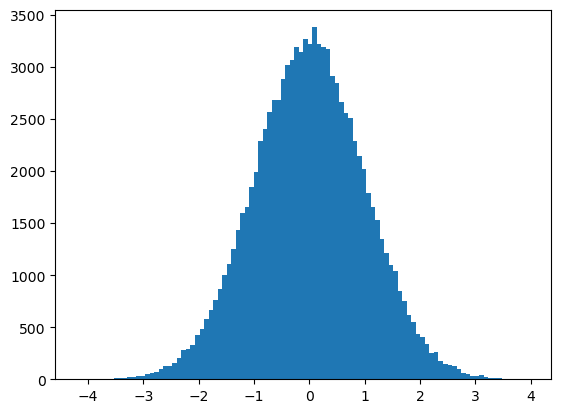

In [454]:
x = plt.hist(np.random.normal(size=100000),bins=100)

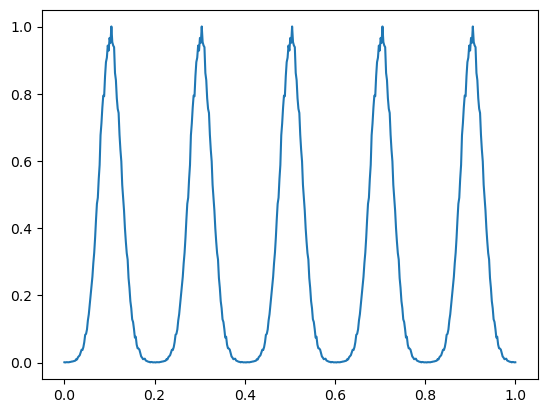

In [504]:
y_data = list(x[0]/(max(x[0])-min(x[0])))*5
x_data = list(np.linspace(0,1,500))
plt.plot(x_data,y_data)

In [505]:
model = KAN(width=[1,1], grid=2000, k=3, noise_scale=0.1, sp_trainable=False, sb_trainable=False, base_fun='zero')

checkpoint directory created: ./model
saving model version 0.0


In [506]:
for group in range(5):
    dataset = {}
    dataset['train_input'] = torch.tensor(x_data[group*100:(group+1)*100], dtype=torch.float32).unsqueeze(1)
    dataset['test_input'] = torch.tensor(x_data[group*100:(group+1)*100], dtype=torch.float32).unsqueeze(1)
    dataset['train_label'] = torch.tensor(y_data[group*100:(group+1)*100], dtype=torch.float32).unsqueeze(1)
    dataset['test_label'] = torch.tensor(y_data[group*100:(group+1)*100], dtype=torch.float32).unsqueeze(1)

    results = model.fit(dataset, opt="LBFGS", update_grid=False, steps=100)

| train_loss: 1.64e-08 | test_loss: 1.64e-08 | reg: 3.65e+00 | : 100%|█| 100/100 [00:02<00:00, 37.63


saving model version 0.1


| train_loss: 6.97e-09 | test_loss: 6.97e-09 | reg: 3.65e+00 | : 100%|█| 100/100 [00:01<00:00, 50.50


saving model version 0.2


| train_loss: 1.38e-08 | test_loss: 1.38e-08 | reg: 3.65e+00 | : 100%|█| 100/100 [00:02<00:00, 38.66


saving model version 0.3


| train_loss: 8.52e-09 | test_loss: 8.52e-09 | reg: 3.65e+00 | : 100%|█| 100/100 [00:02<00:00, 42.83


saving model version 0.4


| train_loss: 1.69e-09 | test_loss: 1.69e-09 | reg: 3.65e+00 | : 100%|█| 100/100 [00:01<00:00, 50.87

saving model version 0.5


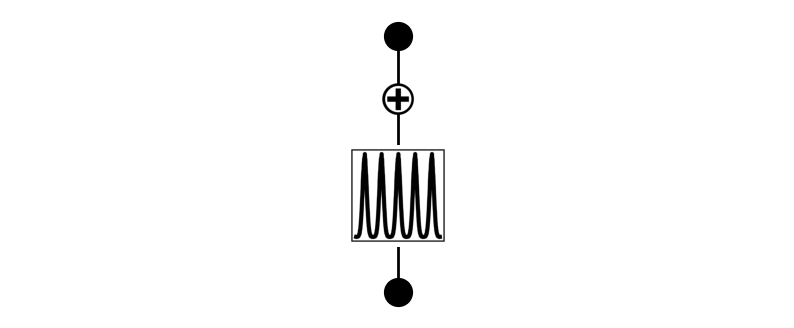

In [507]:
x_pred = model(torch.tensor(np.linspace(0,1,500), dtype=torch.float32).unsqueeze(1))
model.plot(scale=1)

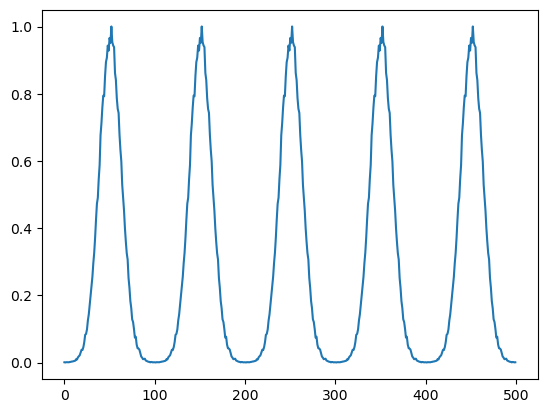

In [508]:
plt.plot(x_pred.detach())

In [545]:
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 50)  # 4 inputs to 5 hidden nodes
        self.relu = nn.Sigmoid()
        self.fc2 = nn.Linear(50, 50) 
        self.relu = nn.Sigmoid()
        self.fc3 = nn.Linear(50, 1)  # 5 hidden nodes to 3 outputs

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

def train_model(model, train_loader, criterion, optimizer, num_epochs=100):
    model.train()
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

def test_model(model, test_loader):
    model.eval()
    total_loss = 0.0
    total_count = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            outputs = model(inputs)
            loss = torch.nn.functional.mse_loss(outputs, labels, reduction='sum')
            total_loss += loss.item()
            total_count += labels.size(0)

    # Calculate the average MSE over all batches
    average_mse = total_loss / total_count
    print(f'Mean Squared Error: {average_mse}')

In [546]:
def load_dataset(dataset):
    # Create data loaders (optional, if you want to batch and shuffle the data)
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(dataset['train_input'], dataset['train_label']), batch_size=1000, shuffle=False)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(dataset['test_input'], dataset['test_label']), batch_size=1000, shuffle=False)

    return train_loader, test_loader

In [547]:
N=10000
model = NeuralNetwork().to(device)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

for group in range(5):
    dataset = {}
    dataset['train_input'] = torch.tensor(x_data[group*100:(group+1)*100], dtype=torch.float32).unsqueeze(1)
    dataset['test_input'] = torch.tensor(x_data[group*100:(group+1)*100], dtype=torch.float32).unsqueeze(1)
    dataset['train_label'] = torch.tensor(y_data[group*100:(group+1)*100], dtype=torch.float32).unsqueeze(1)
    dataset['test_label'] = torch.tensor(y_data[group*100:(group+1)*100], dtype=torch.float32).unsqueeze(1)
    
    train_loader, test_loader = load_dataset(dataset)
    loss_list = train_model(model, train_loader, criterion, optimizer, num_epochs=N)
    test_model(model, train_loader)
    test_model(model, test_loader)

Epoch 1, Loss: 0.11389588564634323
Epoch 2, Loss: 0.11615034937858582
Epoch 3, Loss: 0.11403438448905945
Epoch 4, Loss: 0.11438912153244019
Epoch 5, Loss: 0.11517862230539322
Epoch 6, Loss: 0.11479746550321579
Epoch 7, Loss: 0.11409874260425568
Epoch 8, Loss: 0.1139020323753357
Epoch 9, Loss: 0.11423971503973007
Epoch 10, Loss: 0.11453445255756378
Epoch 11, Loss: 0.11442888528108597
Epoch 12, Loss: 0.11409994959831238
Epoch 13, Loss: 0.11389370262622833
Epoch 14, Loss: 0.1139630377292633
Epoch 15, Loss: 0.11416066437959671
Epoch 16, Loss: 0.11423908174037933
Epoch 17, Loss: 0.1141263097524643
Epoch 18, Loss: 0.11395416408777237
Epoch 19, Loss: 0.1138857752084732
Epoch 20, Loss: 0.11395640671253204
Epoch 21, Loss: 0.11405876278877258
Epoch 22, Loss: 0.11407341808080673
Epoch 23, Loss: 0.11399194598197937
Epoch 24, Loss: 0.11390367150306702
Epoch 25, Loss: 0.11389003694057465
Epoch 26, Loss: 0.11394467204809189
Epoch 27, Loss: 0.11399262398481369
Epoch 28, Loss: 0.11397897452116013
Epoch

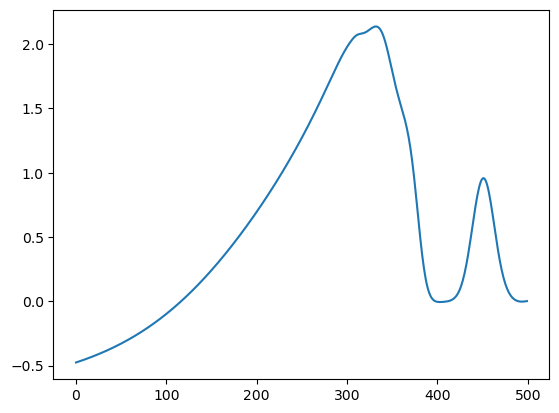

In [548]:
x_pred = model(torch.tensor(np.linspace(0,1,500), dtype=torch.float32).unsqueeze(1))
plt.plot(x_pred.detach())

In [8]:
digits = load_digits(n_class=5, as_frame=True)
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [9]:
# from sklearn.datasets import fetch_openml
# digits = fetch_openml('mnist_784')

In [10]:
data = digits.data.join(pd.to_numeric(digits.target))
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  901 non-null    float64
 1   pixel_0_1  901 non-null    float64
 2   pixel_0_2  901 non-null    float64
 3   pixel_0_3  901 non-null    float64
 4   pixel_0_4  901 non-null    float64
 5   pixel_0_5  901 non-null    float64
 6   pixel_0_6  901 non-null    float64
 7   pixel_0_7  901 non-null    float64
 8   pixel_1_0  901 non-null    float64
 9   pixel_1_1  901 non-null    float64
 10  pixel_1_2  901 non-null    float64
 11  pixel_1_3  901 non-null    float64
 12  pixel_1_4  901 non-null    float64
 13  pixel_1_5  901 non-null    float64
 14  pixel_1_6  901 non-null    float64
 15  pixel_1_7  901 non-null    float64
 16  pixel_2_0  901 non-null    float64
 17  pixel_2_1  901 non-null    float64
 18  pixel_2_2  901 non-null    float64
 19  pixel_2_3  901 non-null    float64
 20  pixel_2_4 

<Axes: >

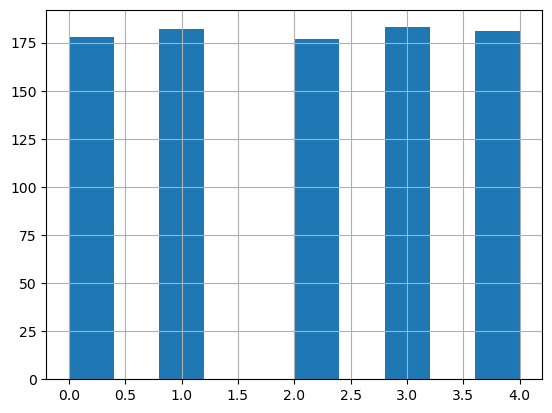

In [12]:
data.target.hist()

In [337]:
# Split dataset into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=1)

In [338]:
train_data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
347,0.00,0.00,4.00,16.00,16.00,4.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,4.00,13.00,10.00,0.00,0.00,0.00,0
785,0.00,0.00,2.00,15.00,14.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,2.00,14.00,9.00,0.00,0.00,0.00,1
592,0.00,1.00,8.00,10.00,14.00,10.00,0.00,0.00,0.00,12.00,...,0.00,0.00,0.00,12.00,16.00,14.00,12.00,4.00,0.00,3
582,0.00,1.00,9.00,15.00,16.00,6.00,0.00,0.00,0.00,13.00,...,0.00,0.00,0.00,10.00,16.00,16.00,14.00,5.00,0.00,3
599,0.00,0.00,0.00,4.00,15.00,12.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,5.00,16.00,5.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.00,0.00,0.00,0.00,9.00,15.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,8.00,16.00,3.00,0.00,1
767,0.00,0.00,2.00,15.00,5.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,3.00,16.00,7.00,0.00,0.00,0.00,4
72,0.00,0.00,13.00,14.00,8.00,1.00,0.00,0.00,0.00,1.00,...,0.00,0.00,1.00,13.00,14.00,12.00,12.00,0.00,0.00,2
235,0.00,0.00,3.00,16.00,9.00,0.00,0.00,0.00,0.00,4.00,...,0.00,0.00,0.00,3.00,10.00,16.00,14.00,3.00,0.00,0


## Preprocessing

In [339]:
def Preprocessing(data):
    #StandardScaler
    sacale = MinMaxScaler()
    target = data['target']
    data = sacale.fit_transform(data.drop(columns=['target']))
    return data, target.tolist()

In [340]:
def train_prepare(train_data, n):
    data = train_data.where(train_data.target==n)
    data = data.dropna()
    data = pd.concat([data, train_data.iloc[0:20]], axis=0)
    return data    

In [341]:
def data_continual_learn(train_data, test_data, n):
    train_data = train_prepare(train_data, n)
    train_x, train_y = Preprocessing(train_data)
    test_x, test_y = Preprocessing(test_data)

    dataset = {}
    dataset['train_input'] = torch.tensor(train_x, dtype=torch.float32, device=device)
    dataset['test_input'] = torch.tensor(test_x, dtype=torch.float32, device=device)
    dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)
    dataset['test_label'] = torch.tensor(test_y, dtype=torch.long, device=device)

    return dataset

In [342]:
train_x, train_y = Preprocessing(train_data)
test_x, test_y = Preprocessing(test_data)

In [343]:
test_x

array([[0.        , 0.66666667, 0.9375    , ..., 0.75      , 0.1875    ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.4375    , 0.        ,
        0.        ],
       [0.        , 0.        , 0.4375    , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.8125    , 0.1875    ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.125     , ..., 0.3125    , 0.        ,
        0.        ]])

## A summary of various machine learning methods and their accuracy

In [344]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

lcf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
train, test = lcf.fit(train_x, test_x, train_y, test_y)

100%|██████████| 29/29 [00:01<00:00, 24.75it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 50
[LightGBM] [Info] Start training from score -1.595645
[LightGBM] [Info] Start training from score -1.602517
[LightGBM] [Info] Start training from score -1.704054
[LightGBM] [Info] Start training from score -1.595645
[LightGBM] [Info] Start training from score -1.555371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [345]:
train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,1.00,1.00,None,1.00,0.02
ExtraTreesClassifier,1.00,1.00,None,1.00,0.10
PassiveAggressiveClassifier,1.00,1.00,None,1.00,0.02
RandomForestClassifier,0.99,1.00,None,0.99,0.15
SVC,0.99,0.99,None,0.99,0.02
CalibratedClassifierCV,0.99,0.99,None,0.99,0.18
RidgeClassifierCV,0.99,0.99,None,0.99,0.02
RidgeClassifier,0.99,0.99,None,0.99,0.00
SGDClassifier,0.99,0.99,None,0.99,0.02


In [346]:
test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,1.00,1.00,None,1.00,0.02
ExtraTreesClassifier,1.00,1.00,None,1.00,0.10
PassiveAggressiveClassifier,1.00,1.00,None,1.00,0.02
RandomForestClassifier,0.99,1.00,None,0.99,0.15
SVC,0.99,0.99,None,0.99,0.02
CalibratedClassifierCV,0.99,0.99,None,0.99,0.18
RidgeClassifierCV,0.99,0.99,None,0.99,0.02
RidgeClassifier,0.99,0.99,None,0.99,0.00
SGDClassifier,0.99,0.99,None,0.99,0.02


## Prepare data for KAN

In [347]:
dataset = {}
dataset['train_input'] = torch.tensor(train_x, dtype=torch.float32, device=device)
dataset['test_input'] = torch.tensor(test_x, dtype=torch.float32, device=device)
dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)
dataset['test_label'] = torch.tensor(test_y, dtype=torch.long, device=device)

In [348]:
dataset['train_input']

tensor([[0.0000, 0.0000, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1250,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.5000,  ..., 0.7500, 0.2500, 0.0000],
        ...,
        [0.0000, 0.0000, 0.8125,  ..., 0.7500, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1875,  ..., 0.8750, 0.1875, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.9375, 0.5625, 0.0000]])

In [349]:
print("Train data shape: {}".format(dataset['train_input'].shape))
print("Train target shape: {}".format(dataset['train_label'].shape))
print("Test data shape: {}".format(dataset['test_input'].shape))
print("Test target shape: {}".format(dataset['test_label'].shape))
print("====================================")

Train data shape: torch.Size([720, 64])
Train target shape: torch.Size([720])
Test data shape: torch.Size([181, 64])
Test target shape: torch.Size([181])


## Creating and Training the KAN

In [418]:
from kan import KAN

model = KAN(width=[64, 5], grid=5, k=3, seed=0, device=device)#, noise_scale=0.5, sp_trainable=False, sb_trainable=False, base_fun='zero')

checkpoint directory created: ./model
saving model version 0.0


In [419]:
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

In [420]:
%%time
N=10
all_result=[]
for i in range(5):
    dataset = data_continual_learn(train_data, test_data, i)
    results = model.fit(dataset, 
                        opt="LBFGS",
                        metrics=(train_acc, test_acc),
                        loss_fn=torch.nn.CrossEntropyLoss(),
                        steps=N, update_grid=False)
    all_result.extend(results['train_loss'])

| train_loss: 0.00e+00 | test_loss: 1.10e+00 | reg: 3.61e+02 | : 100%|█| 10/10 [00:00<00:00, 10.59it


saving model version 0.1


| train_loss: 0.00e+00 | test_loss: 1.23e+00 | reg: 4.03e+02 | : 100%|█| 10/10 [00:01<00:00,  9.17it


saving model version 0.2


| train_loss: 0.00e+00 | test_loss: 8.88e-01 | reg: 4.30e+02 | : 100%|█| 10/10 [00:01<00:00,  8.75it


saving model version 0.3


| train_loss: 0.00e+00 | test_loss: 9.57e-01 | reg: 4.68e+02 | : 100%|█| 10/10 [00:01<00:00,  8.82it


saving model version 0.4


| train_loss: 0.00e+00 | test_loss: 4.44e-01 | reg: 5.09e+02 | : 100%|█| 10/10 [00:01<00:00,  8.94it

saving model version 0.5
CPU times: total: 625 ms
Wall time: 5.49 s


Text(0, 0.5, 'Loss')

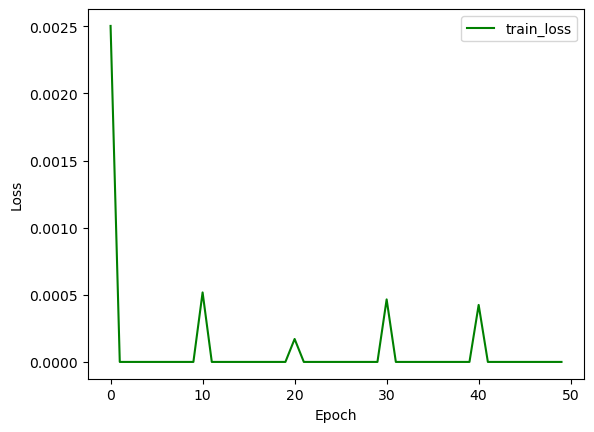

In [421]:
plt.plot(all_result, 'g', label='train_loss') 
#plt.plot(range(N),results['test_loss'], 'y', label='validation_loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [422]:
print('Training Accuracy :', results['train_acc'][-1])
print('Test Accuracy :', results['test_acc'][-1])

Training Accuracy : 1.0
Test Accuracy : 0.9447513818740845


In [423]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print('Total trainable parameters :', params)

Total trainable parameters : 4480


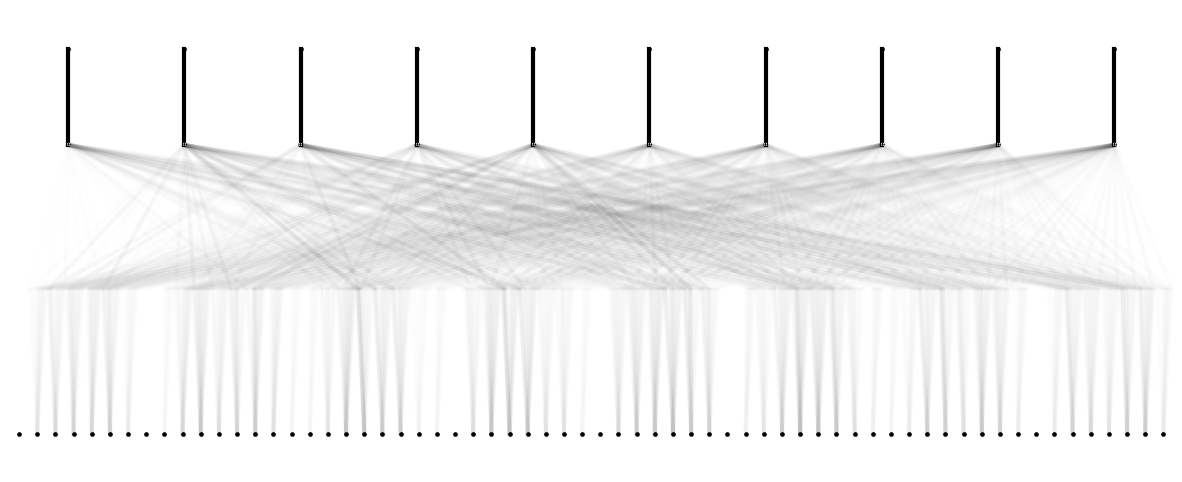

In [1010]:
model.plot(scale=1.5)

## Creating and Training the KAN [26, 26, 2]

In [800]:
model = KAN(width=[64, 10], grid=5, k=3, seed=0)

checkpoint directory created: ./model
saving model version 0.0


In [801]:
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

In [803]:
%%time

results = model.fit(dataset, 
                    opt="LBFGS",
                    metrics=(train_acc, test_acc),
                    loss_fn=torch.nn.CrossEntropyLoss(),
                    steps=100)

| train_loss: 0.00e+00 | test_loss: 1.67e+00 | reg: 0.00e+00 | : 100%|█| 100/100 [00:31<00:00,  3.23

saving model version 0.1
CPU times: total: 11.5 s
Wall time: 31 s


In [805]:
print('Training Accuracy :', results['train_acc'][-1])
print('Test Accuracy :', results['test_acc'][-1])

Training Accuracy : 1.0
Test Accuracy : 0.9472222328186035


In [795]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print('Total trainable parameters :', params)

Total trainable parameters : 8960


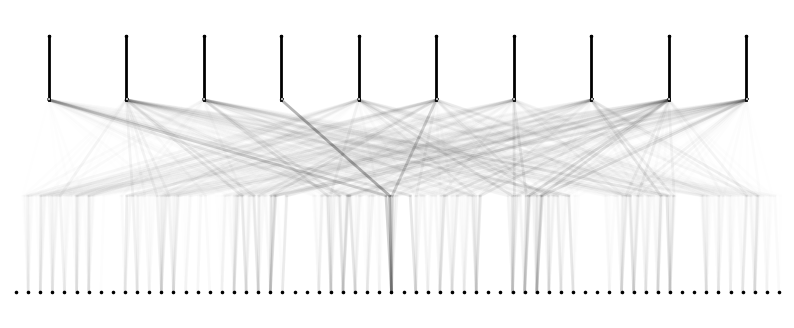

In [797]:
model.plot(scale=1)

In [798]:
model.prune()

saving model version 0.2


MultKAN(
  (act_fun): ModuleList(
    (0): KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0): Symbolic_KANLayer()
  )
)

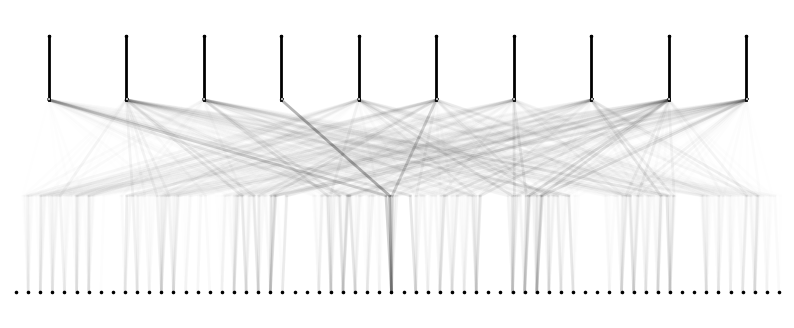

In [799]:
model.plot(scale=1)

# Implementation of a Neural Network for comparison

In [549]:
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(64, 64)  # 4 inputs to 5 hidden nodes
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(64, 5)  # 5 hidden nodes to 3 outputs

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

def train_model(model, train_loader, criterion, optimizer, num_epochs=100):
    model.train()
    loss_list = []
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        loss_list.append(loss.item())
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')
    return loss_list

def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy}%')

In [550]:
def load_dataset(dataset):
    # Create data loaders (optional, if you want to batch and shuffle the data)
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(dataset['train_input'], dataset['train_label']), batch_size=1000, shuffle=False)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(dataset['test_input'], dataset['test_label']), batch_size=1000, shuffle=False)

    return train_loader, test_loader


## Train and Evaluate the NN

In [563]:
%%time
N=1000
model = NeuralNetwork().to(device)

CPU times: total: 0 ns
Wall time: 1.03 ms


In [564]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
all_loss=[]

for i in range(5):
    train_loader, test_loader = load_dataset(data_continual_learn(train_data, test_data, i))
    loss_list = train_model(model, train_loader, criterion, optimizer, num_epochs=N)
    all_loss.extend(loss_list)
    test_model(model, train_loader)
    test_model(model, test_loader)

Epoch 1, Loss: 1.507520079612732
Epoch 2, Loss: 1.4637095928192139
Epoch 3, Loss: 1.4208686351776123
Epoch 4, Loss: 1.378673791885376
Epoch 5, Loss: 1.336950421333313
Epoch 6, Loss: 1.2956528663635254
Epoch 7, Loss: 1.254705548286438
Epoch 8, Loss: 1.2138996124267578
Epoch 9, Loss: 1.173111915588379
Epoch 10, Loss: 1.1324132680892944
Epoch 11, Loss: 1.0916846990585327
Epoch 12, Loss: 1.0509356260299683
Epoch 13, Loss: 1.0102969408035278
Epoch 14, Loss: 0.9699493050575256
Epoch 15, Loss: 0.9299038052558899
Epoch 16, Loss: 0.8903675079345703
Epoch 17, Loss: 0.8515154123306274
Epoch 18, Loss: 0.8134735226631165
Epoch 19, Loss: 0.7764548063278198
Epoch 20, Loss: 0.7406299114227295
Epoch 21, Loss: 0.7061376571655273
Epoch 22, Loss: 0.6732175350189209
Epoch 23, Loss: 0.6420173048973083
Epoch 24, Loss: 0.6126375794410706
Epoch 25, Loss: 0.5851629972457886
Epoch 26, Loss: 0.5596614480018616
Epoch 27, Loss: 0.5361722707748413
Epoch 28, Loss: 0.5146927833557129
Epoch 29, Loss: 0.495166540145874


Text(0, 0.5, 'Loss')

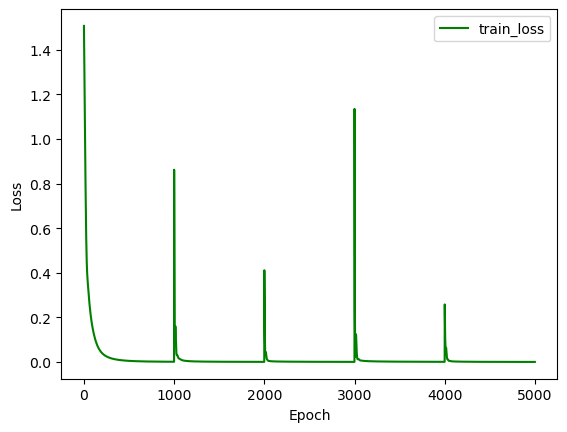

In [565]:
plt.plot(all_loss, 'g', label='train_loss') 
#plt.plot(range(N),results['test_loss'], 'y', label='validation_loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [566]:
test_model(model, test_loader)

Accuracy: 94.47513812154696%


In [567]:
test_model(model, train_loader)

Accuracy: 100.0%


In [429]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
params

4485

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: green; font-size:100%; text-align:left">

<h3 align="center"><font color='white'>💡 Summary from above :</font></h3>

1. Neural Network architecture is much better than KAN 
